Import useful librabries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/drive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
#!ls /mydrive

In [ ]:
Data_file = pd.read_csv("/mydrive/Image_classification/data/Data_file.csv")

In [ ]:
tester_df= pd.read_csv("/mydrive/Image_classification/results/tester_with_pred.csv")
tester1_df= pd.read_csv("/mydrive/Image_classification/results/tester1_with_pred.csv")

In [ ]:
tester_df

,Unnamed: 0,Unnamed: 0.1,File_Name,penguin_ID,Video_ID,Date,Time,Frame_No,Label,Correct_Label,Predicted_Label,Probability
0,0,0,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,GI-LP0238,MOVI0006,2016-10-20,07:52:28,4200,nonprey,0,0,1.102574e-01
1,1,1,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,GI-LP0238,MOVI0006,2016-10-20,07:52:28,4201,nonprey,0,0,1.102574e-01
2,2,2,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,GI-LP0238,MOVI0006,2016-10-20,07:52:28,4202,nonprey,0,0,2.078609e-01
3,3,3,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,GI-LP0238,MOVI0006,2016-10-20,07:52:28,4203,nonprey,0,0,2.113096e-01
4,4,4,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,GI-LP0238,MOVI0006,2016-10-20,07:52:28,4204,nonprey,0,0,1.102574e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
139,139,47,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,GI-LP0238,MOVI0006,2016-10-20,07:53:08,5401,nonprey,0,0,1.102574e-01
140,140,48,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,GI-LP0238,MOVI0006,2016-10-20,07:53:08,5402,nonprey,0,0,1.104335e-07
141,141,49,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,GI-LP0238,MOVI0006,2016-10-20,07:53:08,5403,nonprey,0,0,5.650959e-18
142,142,50,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,GI-LP0238,MOVI0006,2016-10-20,07:53:08,5404,nonprey,0,0,1.102574e-01


In [ ]:
vid_pred = tester_df['Predicted_Label']
vid_true = tester_df['Correct_Label']
vid_prob = tester_df['Probability']

In [ ]:
vid1_pred = tester1_df['Predicted_Label']
vid1_true = tester1_df['Correct_Label']
vid1_prob = tester1_df['Probability']

In [ ]:
confusion_matrix(vid_pred, vid_true)

array([[75, 33],
       [18, 18]])

In [ ]:
confusion_matrix(vid1_pred, vid1_true)

array([[43, 45],
       [ 9, 14]])

In [ ]:
def performance_measures(y_pred, y_true):
  """
  Outputs the and specificity of a binary classification prediction model
  Inputs:
    y_pred (list) - predictions from model  
    y_true (list) - true classes of dataset
  Output:
   recall, precision (tuple) - the recall, precision of the model
  """
  confusion = confusion_matrix(y_pred, y_true)
  TP = confusion[1,1]
  FN = confusion[0,1]
  FP = confusion[1,0]

  recall = TP/(TP+FN)
  precision = TP/(TP+FP)

  return recall, precision

In [ ]:
performance_measures(vid_pred, vid_true)

(0.35294117647058826, 0.5)

In [ ]:
performance_measures(vid1_pred, vid1_true)

(0.23728813559322035, 0.6086956521739131)

In [ ]:
def plot_results(start_datetime, frame_rate, true, pred):
  """
  Outputs and saves line graph of the true and predicted classes of images in a clip
  Inputs:
    start_datetime (str) - the start time of video clip used
    frame_rate (int) - the number of frames per second in the video clip the 
                        images were extracted from 
    pred (list) - predicted classes of dataset  
    true (list) - true classes of dataset
    filename (str) - path to location and file name of saved plot
  Output:
   visualization 
  """

  import datetime as dt
  import matplotlib.pyplot as plt
  %matplotlib inline

  start_datetime = pd.to_datetime(start_datetime)
  date = start_datetime.date()
  start_time = start_datetime.time()

  time = start_time
  time_label = [start_time]
  delta = dt.timedelta(seconds=(1/frame_rate))

  for i in range(0, (len(pred)-1)):
    time = (dt.datetime.combine(dt.date(1,1,1),time) + delta).time()
    time_label.append(time)
  
  time = start_time
  seconds = int(round(len(pred)/(frame_rate/2),0))
  time_ticks =[start_time]

  for i in range(0, (seconds)):
    time = (dt.datetime.combine(dt.date(1,1,1),time) +  dt.timedelta(seconds=(1/2))).time()
    time_ticks.append(str(time))
    
  df = pd.concat([pd.DataFrame({'time':time_label}).astype('str'),  pd.DataFrame({'prediction':pred}),  pd.DataFrame({'ground_truth':true})], axis=1)
  fig = plt.figure(figsize=(20, 10))
  plt.plot(df['time'],df['prediction'], 'r', label='predictions')
  plt.plot(df['time'],df['ground_truth'], 'b', label='ground truth')
  plt.xlabel('Time on ' + str(date))
  plt.xticks(np.arange(len(pred), step=(frame_rate/2)),time_ticks)
  plt.ylabel('Prediction')
  plt.legend()
  plt.show()

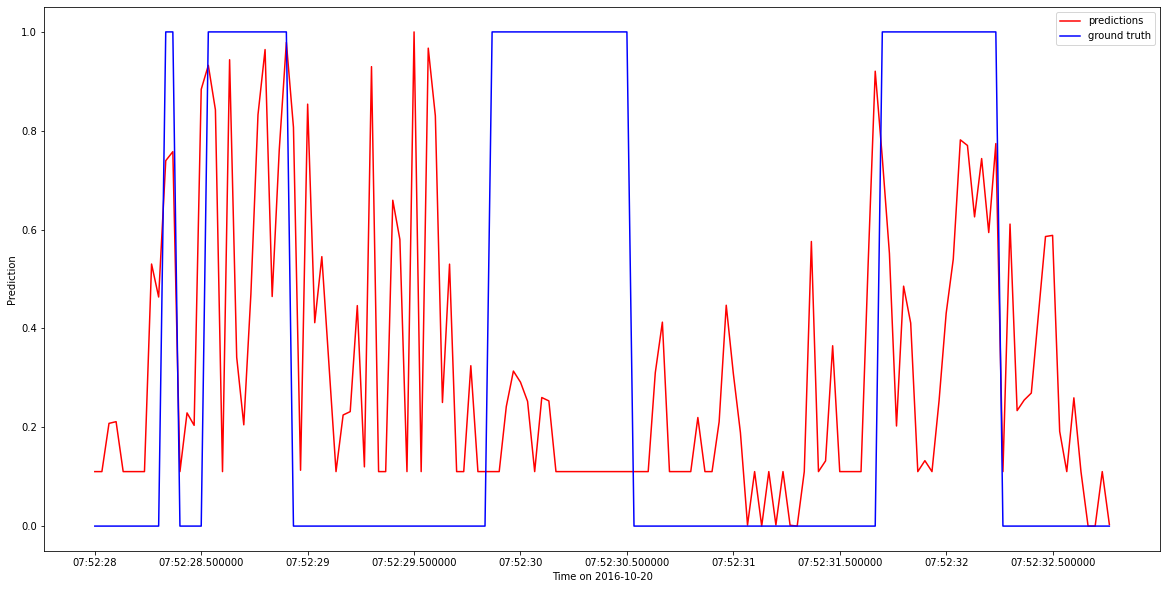

In [ ]:
plot_results('2016-10-20 07:52:28', frame_rate = 30, true = vid_true, pred = vid_prob)

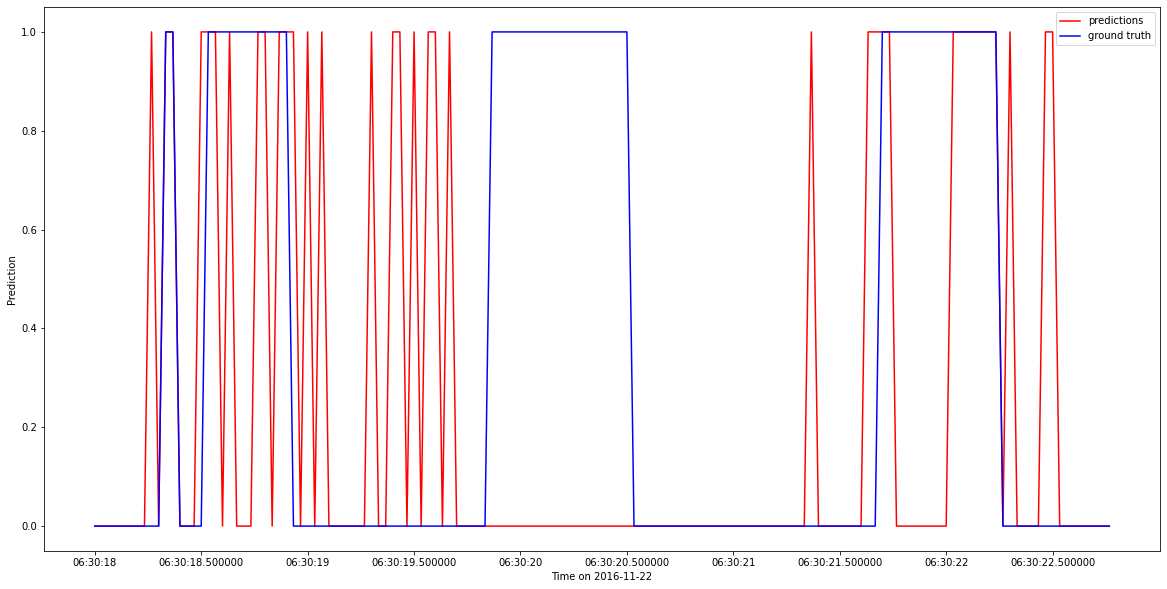

In [ ]:
plot_results('2016-11-22 06:30:18', frame_rate = 30, true = vid_true, pred = vid_pred)